## INTRO MACHINE LEARNING

---

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.
Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Los objetivos de hoy son:

Buscar un conjunto de datos a analizar:
Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [443]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import sidetable

# librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
import warnings

# Visualizacion de todas las columnas
pd.options.display.max_columns = None

# Reemplazo de nulos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [444]:
df= pd.read_csv('../files/life_data.csv', index_col=0)

---

### 1) Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [445]:
df.shape

(2938, 21)

In [446]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expen

In [448]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [449]:
df.describe(include='object')

,Status
count,2938
unique,2
top,Developing
freq,2426


In [450]:
df.duplicated().sum()

0

In [451]:
numericas = df.select_dtypes(include= np.number)

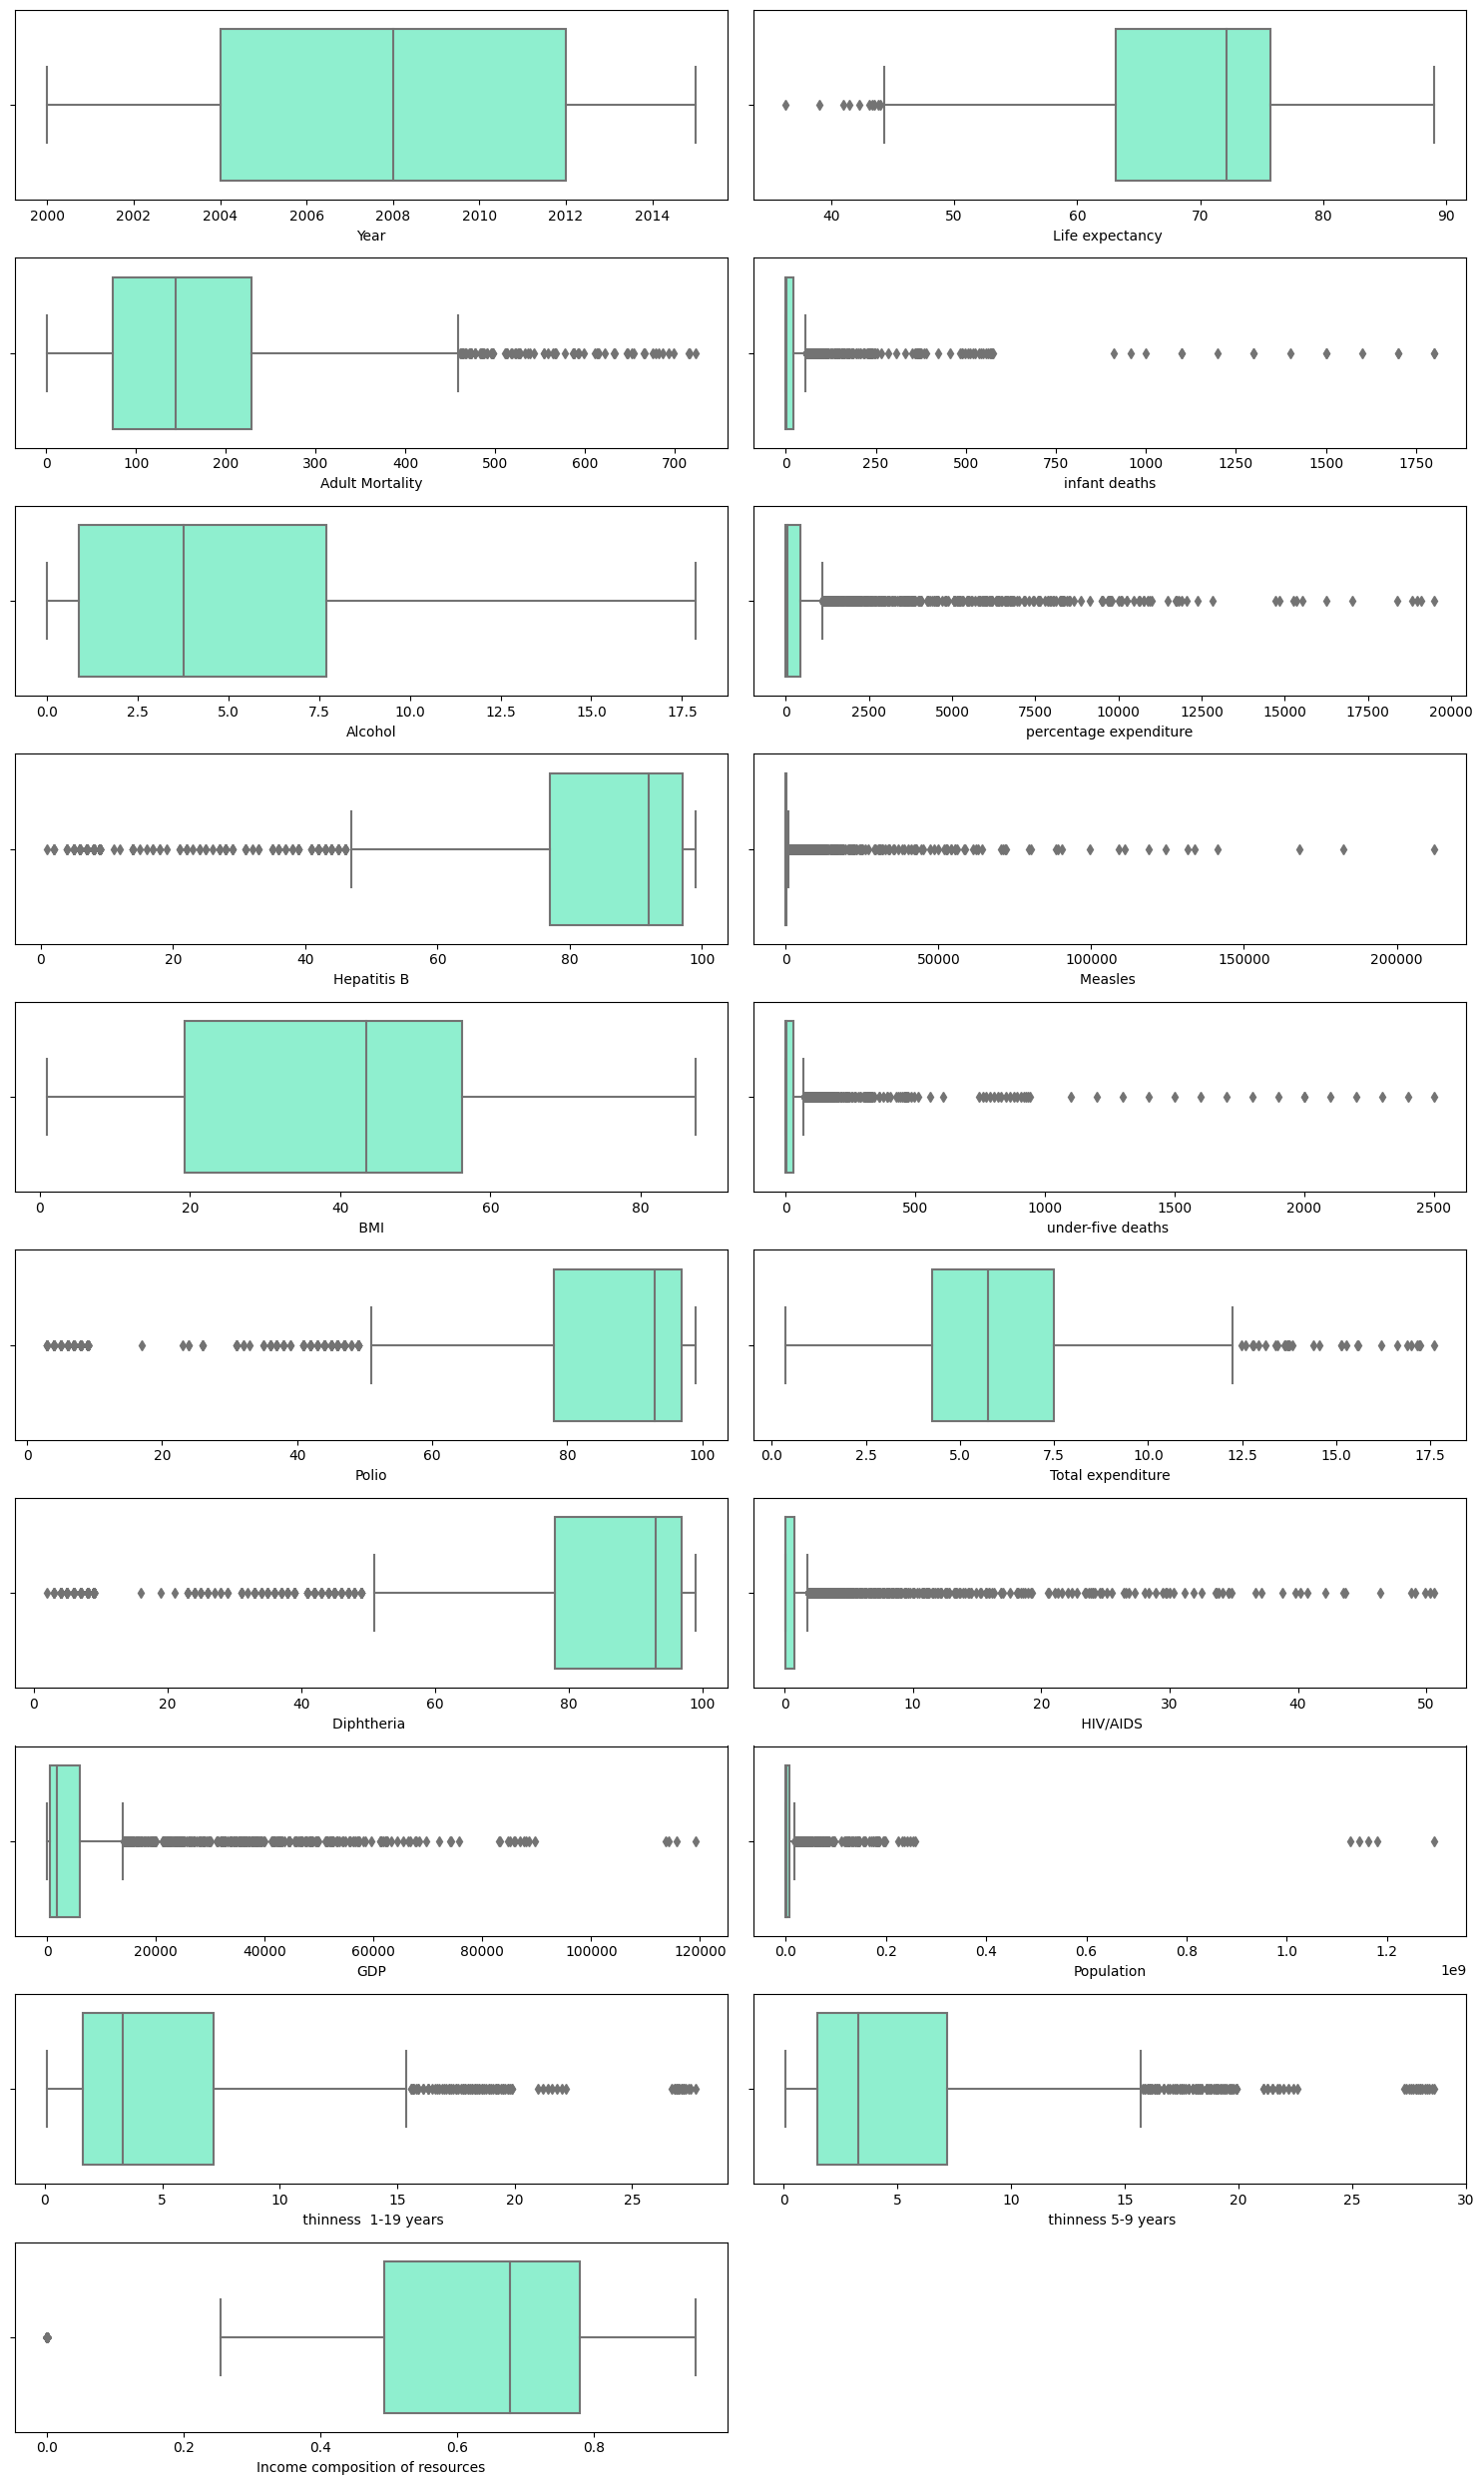

In [452]:
fig, axes = plt.subplots(10, 2, figsize=(15,25))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [453]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

---

### Homogenizar las columnas

In [454]:
df.reset_index(inplace=True)

In [455]:
cambio_columnas = {col :  col.lower().strip().replace(" ","_") for col in df.columns}

In [456]:
df.rename(columns = cambio_columnas, inplace=True)

In [457]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

---

### Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
Esto se hace para que comprendais mejor los datos con los que estais trabajando.

In [458]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

Columnas:

- 'Year'= Año de la observación

- 'Status'= Developped o Developping

- 'Life expectancy '=  Expectativa de vida en años

- 'Adult Mortality'= Mortalidad de Adultos

- 'infant deaths'= Tasas de mortalidad de adultos de ambos sexos (probabilidad de morir entre los 15 y los 60 años por 1000

- 'Alcohol'= Consumo en litros de alcohol puro per capita para mayores de 15 años al año.

- 'percentage expenditure'= Gasto sanitario en porcentaje del Producto Interior Bruto per cápita(%)

- 'Hepatitis B'= Cobertura de vacunación contra la hepatitis B (HepB) entre niños de 1 año (%)

- 'Measles '= Sarampión - número de casos notificados por 1000 habitantes

- ' BMI '= Índice de masa corporal medio de toda la población

- 'under-five deaths '= Número de muertes de menores de 5 años por 1000 habitantes

- 'Polio'= Polio (Pol3) immunization coverage among 1-year-olds (%)

- 'Total expenditure'= Gasto de las administraciones públicas en sanidad como porcentaje del total de las administraciones públicas

- 'Diphtheria '= Cobertura de vacunación contra la difteria, el tétanos y la tos ferina (DTP3) en niños de 1 año (%)

- ' HIV/AIDS' = Muertes por cada 1 000 nacidos vivos VIH/SIDA (0-4 años)

- 'GDP'= Producto Interior Bruto per cápita (en USD)

- 'Population'= Población del país

- ' thinness  1-19 years'= Prevalencia de la delgadez entre niños y adolescentes de 10 a 19 años (% )

- ' thinness 5-9 years'= Prevalencia de la delgadez entre los niños de 5 a 9 años(%)

- 'Income composition of resources'= Índice de Desarrollo Humano en función de la composición de los recursos (índice de 0 a 1)

- 'Schooling'= Número de años de escolarización(años)

In [459]:
df.corr()

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_22890/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage_expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
hepatitis_b,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
bmi,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five_deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


---

### VARIABLE RESPUESTA:


Life_Expectancy

In [460]:
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [461]:
df["status"].value_counts()

Developing    2426
Developed      512
Name: status, dtype: int64

### Creación columna continentes

In [462]:
# !pip install a-world-of-countries #Instalacion de libreria

In [463]:
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [464]:
import awoc

In [465]:
# Initialize the AWOC class.
my_world = awoc.AWOC()

In [466]:
countries = my_world.get_countries()

In [467]:
#nulos= df[~ pd.notnull(df["continente"])] #Generamos un data Frame con los nulos de la columna 'continente'

In [468]:
dic_replace= {'Bolivia (Plurinational State of)': 'Bolivia', 'Brunei Darussalam':"Brunei",
       "Côte d'Ivoire": "Ivory Coast", 'Cabo Verde': 'Cape Verde', 'Congo':'Republic of the Congo', 'Czechia':'Czech Republic',
       "Democratic People's Republic of Korea": 'North Korea',
       'Iran (Islamic Republic of)':'Iran', "Lao People's Democratic Republic":'Laos',
       'Micronesia (Federated States of)': 'Micronesia', 'Republic of Korea': 'South Korea' ,
       'Republic of Moldova': 'Moldova', 'Russian Federation':  'Russia',
       'Syrian Arab Republic': 'Syria',
       'The former Yugoslav republic of Macedonia':'Macedonia', 'Timor-Leste':'Indonesia',
       'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
       'United Republic of Tanzania':'Tanzania', 'United States of America':'United States',
       'Venezuela (Bolivarian Republic of)':'Venezuela', 'Viet Nam':'Vietnam'}

In [469]:
df.country.replace(dic_replace, inplace=True)

In [470]:
nombres= []
continentes = []

for i in range(len(countries)):

    nombres.append(countries[i]['Country Name'])
    continentes.append(countries[i]['Continent Name'])

mapa = dict(zip(nombres, continentes))


In [471]:
df["continente"] = df["country"].map(mapa,na_action="ignore")

In [472]:
df.continente.isnull().sum()#Verificamos que la columna nueva de continentes no tiene ningun nulo

0

In [473]:
df.continente.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

---

## Tratamiento de nulos

In [474]:
df.stb.missing()

,missing,total,percent
population,652,2938,22.191967
hepatitis_b,553,2938,18.822328
gdp,448,2938,15.248468
total_expenditure,226,2938,7.692308
alcohol,194,2938,6.603131
income_composition_of_resources,167,2938,5.684139
schooling,163,2938,5.547992
thinness_5-9_years,34,2938,1.157250
thinness__1-19_years,34,2938,1.157250
bmi,34,2938,1.157250


In [475]:
numericas = df.select_dtypes(include = np.number)

### Nulos columna respuesta

In [476]:
df.life_expectancy.isnull().sum()

10

##### `Visto que tenemos nulos en varias de nuestras columnas hemos decidido usar el metodo IntertiveImputer para remplazar los nulos.`

In [477]:
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')


In [478]:
imputer.fit(numericas)


IterativeImputer()

In [479]:
imputer.transform(numericas)

array([[2.015e+03, 6.500e+01, 2.630e+02, ..., 1.730e+01, 4.790e-01,
        1.010e+01],
       [2.014e+03, 5.990e+01, 2.710e+02, ..., 1.750e+01, 4.760e-01,
        1.000e+01],
       [2.013e+03, 5.990e+01, 2.680e+02, ..., 1.770e+01, 4.700e-01,
        9.900e+00],
       ...,
       [2.002e+03, 4.480e+01, 7.300e+01, ..., 1.300e+00, 4.270e-01,
        1.000e+01],
       [2.001e+03, 4.530e+01, 6.860e+02, ..., 1.700e+00, 4.270e-01,
        9.800e+00],
       [2.000e+03, 4.600e+01, 6.650e+02, ..., 1.120e+01, 4.340e-01,
        9.800e+00]])

In [480]:
numericas_sinnull = pd.DataFrame(imputer.transform(numericas), columns = numericas.columns)

In [481]:
numericas_sinnull.isnull().sum()

year                               0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [482]:
columnas = numericas_sinnull.columns


In [483]:
df.drop(columnas, axis = 1, inplace = True)

In [484]:
df[columnas] = numericas_sinnull[columnas]


In [485]:
df.stb.missing()

,missing,total,percent
country,0,2938,0.0
under-five_deaths,0,2938,0.0
income_composition_of_resources,0,2938,0.0
thinness_5-9_years,0,2938,0.0
thinness__1-19_years,0,2938,0.0
population,0,2938,0.0
gdp,0,2938,0.0
hiv/aids,0,2938,0.0
diphtheria,0,2938,0.0
total_expenditure,0,2938,0.0


---

### Tratamiento Outliers

In [486]:
numericas = df.select_dtypes(include= np.number)

In [487]:
lista_columnas=numericas.columns.to_list()

In [488]:
def detectar_outliers(lista_columnas, dataframe):
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        print(col)
        display(outliers_data)
        print(outliers_data.shape)
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila.
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    return dicc_indices

In [489]:
indices_outliers=detectar_outliers(lista_columnas,df)

year


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling


(0, 23)
life_expectancy


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1127,Haiti,Developing,North America,2010.0,36.3,682.0,23.0,5.76,36.292918,67.549144,0.0,44.2,58.0,66.0,8.90,66.0,1.9,662.279518,9999617.0,4.0,4.0,0.470,8.6
1583,Malawi,Developing,Africa,2002.0,44.0,67.0,46.0,1.10,3.885395,64.000000,92.0,14.8,75.0,79.0,4.82,64.0,24.7,29.979898,1213711.0,7.7,7.6,0.388,10.4
1584,Malawi,Developing,Africa,2001.0,43.5,599.0,48.0,1.15,12.797606,33.595218,150.0,14.4,80.0,86.0,5.70,9.0,25.1,146.761540,11695863.0,7.9,7.7,0.387,10.1
1585,Malawi,Developing,Africa,2000.0,43.1,588.0,51.0,1.18,13.762702,67.295507,304.0,14.1,84.0,73.0,6.70,75.0,25.5,153.259487,11376172.0,8.0,7.9,0.391,10.7
2306,Sierra Leone,Developing,Africa,2006.0,44.3,464.0,30.0,3.80,38.000758,64.357542,33.0,19.7,46.0,65.0,1.68,64.0,2.2,322.313468,5848692.0,9.1,9.1,0.348,8.0
2307,Sierra Leone,Developing,Africa,2005.0,43.3,48.0,30.0,3.83,42.088929,64.977851,29.0,19.2,47.0,67.0,12.25,65.0,2.2,287.689194,5658379.0,9.3,9.3,0.341,7.8
2308,Sierra Leone,Developing,Africa,2004.0,42.3,496.0,30.0,3.99,38.524548,65.423635,7.0,18.8,47.0,69.0,11.66,65.0,2.1,263.145817,5439695.0,9.5,9.5,0.332,7.6
2309,Sierra Leone,Developing,Africa,2003.0,41.5,57.0,30.0,4.07,38.614732,68.418212,586.0,18.4,47.0,66.0,11.69,73.0,1.9,263.761831,5199549.0,9.7,9.8,0.322,7.4
2311,Sierra Leone,Developing,Africa,2001.0,41.0,519.0,30.0,4.21,33.346915,40.594882,649.0,17.5,48.0,38.0,11.83,38.0,1.5,227.779471,4739147.0,1.1,1.2,0.302,7.0
2312,Sierra Leone,Developing,Africa,2000.0,39.0,533.0,29.0,3.97,20.395683,45.346212,3575.0,17.2,48.0,46.0,13.63,44.0,1.2,139.314773,4564297.0,1.3,1.4,0.292,6.7


(12, 23)
adult_mortality


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
345,Botswana,Developing,Africa,2006.0,54.8,491.0,2.0,6.45,76.318679,93.0,6.0,33.2,3.0,96.0,4.93,96.0,14.4,5374.554867,1884238.0,9.6,9.4,0.610,11.9
346,Botswana,Developing,Africa,2005.0,51.7,566.0,2.0,6.37,629.842564,92.0,5.0,32.7,3.0,96.0,5.62,96.0,20.6,5351.253732,1855852.0,1.0,9.9,0.593,11.9
347,Botswana,Developing,Africa,2004.0,48.1,652.0,2.0,4.90,469.582390,91.0,1.0,32.2,4.0,96.0,5.56,96.0,28.4,4896.583835,182933.0,1.5,1.4,0.580,11.8
348,Botswana,Developing,Africa,2003.0,46.4,693.0,2.0,5.51,299.367125,9.0,59.0,31.6,4.0,96.0,4.65,96.0,31.9,4163.659600,184339.0,1.9,1.8,0.567,11.8
349,Botswana,Developing,Africa,2002.0,46.0,699.0,2.0,6.41,6.330007,88.0,7.0,31.1,4.0,97.0,6.47,97.0,34.6,355.618382,1779953.0,11.4,11.3,0.558,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,Zimbabwe,Developing,Africa,2005.0,44.6,717.0,28.0,4.14,8.717409,65.0,420.0,27.5,43.0,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,Developing,Africa,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,Developing,Africa,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2936,Zimbabwe,Developing,Africa,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


(86, 23)
infant_deaths


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,71.279624,65.000000,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479000,10.100000
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,73.523582,62.000000,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,17.5,17.5,0.476000,10.000000
2,Afghanistan,Developing,Asia,2013.0,59.9,268.0,66.0,0.01,73.219243,64.000000,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,3.173169e+07,17.7,17.7,0.470000,9.900000
3,Afghanistan,Developing,Asia,2012.0,59.5,272.0,69.0,0.01,78.184215,67.000000,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,17.9,18.0,0.463000,9.800000
4,Afghanistan,Developing,Asia,2011.0,59.2,275.0,71.0,0.01,7.097109,68.000000,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,18.2,18.2,0.454000,9.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,Tanzania,Developing,Africa,2004.0,51.5,454.0,100.0,3.81,0.000000,95.000000,1419.0,17.7,154.0,95.0,4.10,95.0,10.8,781.991293,2.025283e+07,7.8,7.8,0.399980,8.589527
2790,Tanzania,Developing,Africa,2003.0,58.0,459.0,103.0,2.34,0.000000,95.000000,1673.0,17.2,160.0,97.0,4.60,95.0,11.5,1542.670711,2.042061e+07,7.9,7.9,0.464721,9.680535
2791,Tanzania,Developing,Africa,2002.0,52.0,46.0,106.0,3.37,0.000000,89.000000,5131.0,16.8,166.0,91.0,3.59,89.0,12.1,1677.031080,1.971328e+07,8.0,8.0,0.411581,8.578909
2792,Tanzania,Developing,Africa,2001.0,49.6,46.0,110.0,4.09,0.000000,71.142028,11847.0,16.4,173.0,65.0,3.28,87.0,12.5,744.536019,2.031871e+07,8.2,8.1,0.378010,8.031176


(315, 23)
alcohol


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
228,Belarus,Developing,Europe,2011.0,72.0,232.0,0.0,17.31,846.911307,98.0,50.0,59.9,1.0,98.0,4.92,98.0,0.1,6519.71753,9473172.0,2.0,2.1,0.787,15.5
874,Estonia,Developing,Europe,2007.0,73.0,189.0,0.0,17.87,1904.124690,95.0,1.0,56.3,0.0,95.0,5.16,95.0,0.1,16586.45200,13468.0,2.0,2.1,0.829,16.1


(2, 23)
percentage_expenditure


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
65,Antigua and Barbuda,Developing,North America,2014.0,76.2,131.0,0.0,8.56,2422.999774,99.0,0.0,47.0,0.0,96.0,5.54,99.0,0.2,12888.29667,7.817189e+06,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,Developing,North America,2013.0,76.1,133.0,0.0,8.58,1991.430372,99.0,0.0,46.4,0.0,98.0,5.33,99.0,0.2,12224.86416,7.654717e+06,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,Developing,North America,2012.0,75.9,134.0,0.0,8.18,2156.229842,98.0,0.0,45.7,0.0,97.0,5.39,98.0,0.2,12565.44197,7.245361e+06,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,Developing,North America,2011.0,75.7,136.0,0.0,7.84,1810.875316,99.0,0.0,45.1,0.0,99.0,5.65,99.0,0.1,11929.34991,7.051058e+06,3.3,3.3,0.782,14.1
69,Antigua and Barbuda,Developing,North America,2010.0,75.6,138.0,0.0,7.84,1983.956937,98.0,0.0,44.4,0.0,99.0,5.63,98.0,0.1,12126.87614,6.736778e+06,3.3,3.3,0.783,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,United Arab Emirates,Developing,Asia,2004.0,75.1,95.0,1.0,1.77,2972.448675,92.0,22.0,57.0,1.0,94.0,2.46,94.0,0.1,36161.17610,6.659686e+06,5.2,4.9,0.813,12.4
2759,United Arab Emirates,Developing,Asia,2002.0,74.7,11.0,1.0,1.72,2598.842827,92.0,53.0,56.0,1.0,94.0,2.72,94.0,0.1,31311.35936,6.061622e+06,5.3,5.0,0.803,12.1
2815,Uruguay,Developing,South America,2010.0,76.3,118.0,0.0,6.21,2331.532804,95.0,0.0,61.2,1.0,95.0,8.63,95.0,0.1,11938.21200,3.374415e+06,1.5,1.5,0.777,15.6
2816,Uruguay,Developing,South America,2009.0,76.6,118.0,0.0,6.67,1871.736563,95.0,0.0,6.7,1.0,95.0,8.78,95.0,0.1,9415.17386,3.362755e+06,1.5,1.5,0.774,15.5


(389, 23)
hepatitis_b


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
40,Algeria,Developing,Africa,2007.0,73.8,129.0,20.0,0.440000,320.323924,9.000000,0.0,5.8,23.0,95.0,3.820000,95.0,0.1,3935.183343,3.437600e+04,6.0,5.9,0.690,12.3
41,Algeria,Developing,Africa,2006.0,73.4,132.0,20.0,0.360000,270.240196,8.000000,944.0,49.8,23.0,95.0,3.360000,95.0,0.1,3464.617900,3.377792e+07,6.1,6.0,0.686,12.3
59,Angola,Developing,Africa,2004.0,47.1,386.0,94.0,3.530000,8.866777,13.274246,29.0,17.2,152.0,4.0,4.710000,4.0,2.5,141.868440,1.886572e+07,1.2,1.1,0.415,6.4
60,Angola,Developing,Africa,2003.0,46.8,388.0,95.0,3.490000,35.933491,13.053739,1196.0,16.8,155.0,4.0,4.410000,4.0,2.4,779.468356,1.823369e+06,1.4,1.3,0.406,5.9
63,Angola,Developing,Africa,2000.0,45.3,48.0,97.0,1.850000,15.881493,24.653806,2219.0,15.4,160.0,3.0,2.790000,28.0,2.0,555.296942,1.644924e+06,1.9,1.9,0.382,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,Yemen,Developing,Asia,2000.0,68.0,252.0,48.0,0.070000,0.000000,14.000000,0.0,31.2,66.0,74.0,4.140000,74.0,0.1,-131.723123,1.884500e+07,14.1,14.1,0.436,7.7
2906,Zambia,Developing,Africa,2015.0,61.8,33.0,27.0,2.656162,0.000000,9.000000,9.0,23.4,40.0,9.0,5.541383,9.0,4.1,1313.889646,1.615870e+05,6.3,6.1,0.576,12.5
2914,Zambia,Developing,Africa,2007.0,52.6,487.0,32.0,2.080000,10.851482,8.000000,535.0,19.2,51.0,77.0,4.370000,8.0,13.6,114.587985,1.272597e+07,6.9,6.8,0.492,11.1
2927,Zimbabwe,Developing,Africa,2010.0,52.4,527.0,29.0,5.210000,53.308581,9.000000,9696.0,29.4,44.0,89.0,5.370000,89.0,15.7,713.635620,1.486317e+06,7.1,7.0,0.436,10.0


(269, 23)
measles


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,71.279624,65.000000,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
3,Afghanistan,Developing,Asia,2012.0,59.5,272.0,69.0,0.01,78.184215,67.000000,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,Asia,2011.0,59.2,275.0,71.0,0.01,7.097109,68.000000,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,Developing,Asia,2010.0,58.8,279.0,74.0,0.01,79.679367,66.000000,1989.0,16.7,102.0,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,Developing,Asia,2009.0,58.6,281.0,77.0,0.01,56.762217,63.000000,2861.0,16.2,106.0,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,Zambia,Developing,Africa,2001.0,44.6,611.0,43.0,2.61,46.830275,76.306882,16997.0,17.1,70.0,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,Developing,Africa,2000.0,43.8,614.0,44.0,2.62,45.616880,75.195928,30930.0,16.8,72.0,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6
2927,Zimbabwe,Developing,Africa,2010.0,52.4,527.0,29.0,5.21,53.308581,9.000000,9696.0,29.4,44.0,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2934,Zimbabwe,Developing,Africa,2003.0,44.5,715.0,26.0,4.06,0.000000,7.000000,998.0,26.7,41.0,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5


(542, 23)
bmi


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling


(0, 23)
under-five_deaths


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,71.279624,65.000000,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479000,10.100000
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,73.523582,62.000000,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,17.5,17.5,0.476000,10.000000
2,Afghanistan,Developing,Asia,2013.0,59.9,268.0,66.0,0.01,73.219243,64.000000,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,3.173169e+07,17.7,17.7,0.470000,9.900000
3,Afghanistan,Developing,Asia,2012.0,59.5,272.0,69.0,0.01,78.184215,67.000000,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,17.9,18.0,0.463000,9.800000
4,Afghanistan,Developing,Asia,2011.0,59.2,275.0,71.0,0.01,7.097109,68.000000,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,18.2,18.2,0.454000,9.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,Tanzania,Developing,Africa,2003.0,58.0,459.0,103.0,2.34,0.000000,95.000000,1673.0,17.2,160.0,97.0,4.60,95.0,11.5,1542.670711,2.042061e+07,7.9,7.9,0.464721,9.680535
2791,Tanzania,Developing,Africa,2002.0,52.0,46.0,106.0,3.37,0.000000,89.000000,5131.0,16.8,166.0,91.0,3.59,89.0,12.1,1677.031080,1.971328e+07,8.0,8.0,0.411581,8.578909
2792,Tanzania,Developing,Africa,2001.0,49.6,46.0,110.0,4.09,0.000000,71.142028,11847.0,16.4,173.0,65.0,3.28,87.0,12.5,744.536019,2.031871e+07,8.2,8.1,0.378010,8.031176
2793,Tanzania,Developing,Africa,2000.0,49.2,457.0,114.0,3.89,0.000000,66.105861,14649.0,16.0,181.0,64.0,2.64,79.0,12.8,132.975702,1.940684e+07,8.3,8.3,0.347367,7.790726


(394, 23)
polio


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.010000,71.279624,65.0,1154.0,19.1,83.0,6.0,8.160000,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
11,Afghanistan,Developing,Asia,2004.0,57.0,293.0,87.0,0.020000,15.296066,67.0,466.0,13.8,120.0,5.0,8.790000,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,Afghanistan,Developing,Asia,2003.0,56.7,295.0,87.0,0.010000,11.089053,65.0,798.0,13.4,122.0,41.0,8.820000,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
13,Afghanistan,Developing,Asia,2002.0,56.2,3.0,88.0,0.010000,16.887351,64.0,2486.0,13.0,122.0,36.0,7.760000,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
14,Afghanistan,Developing,Asia,2001.0,55.3,316.0,88.0,0.010000,10.574728,63.0,8762.0,12.6,122.0,35.0,7.800000,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,Zambia,Developing,Africa,2015.0,61.8,33.0,27.0,2.656162,0.000000,9.0,9.0,23.4,40.0,9.0,5.541383,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5
2909,Zambia,Developing,Africa,2012.0,59.2,349.0,29.0,2.590000,196.915250,78.0,896.0,21.7,43.0,7.0,4.910000,78.0,5.6,1734.936120,14699937.0,6.5,6.3,0.554,12.3
2911,Zambia,Developing,Africa,2010.0,58.0,363.0,30.0,2.470000,184.364910,83.0,15754.0,2.7,45.0,8.0,4.410000,83.0,6.8,1463.213573,138533.0,6.7,6.5,0.533,11.8
2913,Zambia,Developing,Africa,2008.0,55.7,45.0,31.0,2.120000,153.678375,87.0,140.0,19.7,49.0,9.0,4.870000,87.0,11.9,1369.682490,1382517.0,6.8,6.7,0.504,11.4


(279, 23)
total_expenditure


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1384,Kiribati,Developing,Oceania,2009.0,65.200000,28.000000,0.0,0.54,162.290371,86.000000,0.0,74.6,0.0,84.0,12.24,86.0,0.1,1297.285141,1.568000e+03,0.1,0.1,0.576000,11.900000
1385,Kiribati,Developing,Oceania,2008.0,65.100000,21.000000,0.0,0.46,167.620155,83.000000,0.0,74.1,0.0,74.0,12.23,82.0,0.1,1413.323400,9.844000e+03,0.2,0.1,0.572000,11.600000
1386,Kiribati,Developing,Oceania,2007.0,65.000000,211.000000,0.0,0.68,188.710877,96.000000,0.0,73.4,0.0,93.0,13.66,94.0,0.1,1357.632211,9.631100e+04,0.2,0.1,0.574000,11.800000
1495,Liberia,Developing,Africa,2010.0,59.700000,272.000000,9.0,3.64,41.910524,47.000000,2200.0,24.5,13.0,71.0,11.87,7.0,1.8,327.425970,3.948125e+06,7.4,7.2,0.403000,9.600000
1496,Liberia,Developing,Africa,2009.0,59.200000,277.000000,10.0,3.75,5.592170,64.000000,6.0,24.0,13.0,84.0,14.39,81.0,2.1,33.667491,3.811528e+06,7.6,7.4,0.400000,9.700000
1573,Malawi,Developing,Africa,2012.0,55.300000,42.000000,31.0,0.01,82.768659,96.000000,11.0,18.4,46.0,95.0,12.60,96.0,8.3,374.518820,1.697350e+05,6.6,6.5,0.454000,10.700000
1603,Maldives,Developing,Asia,2014.0,78.200000,62.000000,0.0,0.01,2051.748615,99.000000,0.0,26.2,0.0,99.0,13.73,99.0,0.1,7716.241500,4.100000e+01,13.6,13.7,0.693000,12.700000
1650,Marshall Islands,Developing,Oceania,2013.0,58.979869,226.419046,0.0,0.01,871.878317,8.000000,0.0,81.6,0.0,79.0,17.24,79.0,0.1,3617.752354,9.823460e+06,0.1,0.1,0.171629,0.000000
1700,Micronesia,Developing,Oceania,2014.0,69.400000,164.000000,0.0,1.58,0.000000,81.000000,140.0,68.7,0.0,76.0,13.71,77.0,0.1,338.119937,6.031857e+06,0.2,0.2,0.639000,11.700000
1701,Micronesia,Developing,Oceania,2013.0,69.200000,166.000000,0.0,1.67,0.000000,83.000000,0.0,68.1,0.0,81.0,13.38,81.0,0.1,349.176686,6.105593e+06,0.2,0.2,0.641000,11.700000


(45, 23)
diphtheria


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
11,Afghanistan,Developing,Asia,2004.0,57.0,293.0,87.0,0.020000,15.296066,67.0,466.0,13.8,120.0,5.0,8.790000,5.0,0.1,219.141353,2.411898e+07,19.5,19.7,0.381,6.8
12,Afghanistan,Developing,Asia,2003.0,56.7,295.0,87.0,0.010000,11.089053,65.0,798.0,13.4,122.0,41.0,8.820000,41.0,0.1,198.728544,2.364851e+06,19.7,19.9,0.373,6.5
13,Afghanistan,Developing,Asia,2002.0,56.2,3.0,88.0,0.010000,16.887351,64.0,2486.0,13.0,122.0,36.0,7.760000,36.0,0.1,187.845950,2.197992e+07,19.9,2.2,0.341,6.2
14,Afghanistan,Developing,Asia,2001.0,55.3,316.0,88.0,0.010000,10.574728,63.0,8762.0,12.6,122.0,35.0,7.800000,33.0,0.1,117.496980,2.966463e+06,2.1,2.4,0.340,5.9
15,Afghanistan,Developing,Asia,2000.0,54.8,321.0,88.0,0.010000,10.424960,62.0,6532.0,12.2,122.0,24.0,8.200000,24.0,0.1,114.560000,2.937560e+05,2.3,2.5,0.338,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,Venezuela,Developing,South America,2008.0,73.2,168.0,9.0,8.180000,0.000000,53.0,0.0,58.2,10.0,76.0,3.980000,5.0,0.1,4348.625060,4.615219e+06,1.6,1.5,0.745,13.4
2872,Venezuela,Developing,South America,2001.0,72.5,169.0,10.0,8.050000,0.000000,53.0,115.0,54.1,12.0,87.0,5.210000,7.0,0.1,2139.215190,2.481971e+06,1.8,1.7,0.672,10.4
2906,Zambia,Developing,Africa,2015.0,61.8,33.0,27.0,2.656162,0.000000,9.0,9.0,23.4,40.0,9.0,5.541383,9.0,4.1,1313.889646,1.615870e+05,6.3,6.1,0.576,12.5
2914,Zambia,Developing,Africa,2007.0,52.6,487.0,32.0,2.080000,10.851482,8.0,535.0,19.2,51.0,77.0,4.370000,8.0,13.6,114.587985,1.272597e+07,6.9,6.8,0.492,11.1


(298, 23)
hiv/aids


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
48,Angola,Developing,Africa,2015.0,52.4,335.0,66.0,2.444739,0.000000,64.0,118.0,23.3,98.0,7.0,5.098955,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
49,Angola,Developing,Africa,2014.0,51.7,348.0,67.0,8.330000,23.965612,64.0,11699.0,22.7,101.0,68.0,3.310000,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
50,Angola,Developing,Africa,2013.0,51.1,355.0,69.0,8.100000,35.958573,77.0,8523.0,22.1,105.0,67.0,4.260000,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
51,Angola,Developing,Africa,2012.0,56.0,358.0,72.0,8.240000,256.122524,75.0,4458.0,21.5,110.0,75.0,3.300000,75.0,2.6,4598.249988,259615.0,8.8,8.6,0.508,10.3
52,Angola,Developing,Africa,2011.0,51.0,361.0,75.0,8.060000,239.891392,72.0,1449.0,21.0,115.0,73.0,3.380000,71.0,2.5,4299.128890,24218565.0,8.9,8.8,0.495,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,Africa,2004.0,44.3,723.0,27.0,4.360000,0.000000,68.0,31.0,27.1,42.0,67.0,7.130000,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,Developing,Africa,2003.0,44.5,715.0,26.0,4.060000,0.000000,7.0,998.0,26.7,41.0,7.0,6.520000,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,Developing,Africa,2002.0,44.8,73.0,25.0,4.430000,0.000000,73.0,304.0,26.3,40.0,73.0,6.530000,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,Developing,Africa,2001.0,45.3,686.0,25.0,1.720000,0.000000,76.0,529.0,25.9,39.0,76.0,6.160000,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


(542, 23)
gdp


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
64,Antigua and Barbuda,Developing,North America,2015.0,76.4,13.0,0.0,3.908244,0.000000,99.0,0.0,47.7,0.0,86.0,5.605244,99.0,0.2,13566.95410,7.753828e+06,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,Developing,North America,2014.0,76.2,131.0,0.0,8.560000,2422.999774,99.0,0.0,47.0,0.0,96.0,5.540000,99.0,0.2,12888.29667,7.817189e+06,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,Developing,North America,2013.0,76.1,133.0,0.0,8.580000,1991.430372,99.0,0.0,46.4,0.0,98.0,5.330000,99.0,0.2,12224.86416,7.654717e+06,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,Developing,North America,2012.0,75.9,134.0,0.0,8.180000,2156.229842,98.0,0.0,45.7,0.0,97.0,5.390000,98.0,0.2,12565.44197,7.245361e+06,3.3,3.3,0.778,13.8
69,Antigua and Barbuda,Developing,North America,2010.0,75.6,138.0,0.0,7.840000,1983.956937,98.0,0.0,44.4,0.0,99.0,5.630000,98.0,0.1,12126.87614,6.736778e+06,3.3,3.3,0.783,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,United Arab Emirates,Developing,Asia,2002.0,74.7,11.0,1.0,1.720000,2598.842827,92.0,53.0,56.0,1.0,94.0,2.720000,94.0,0.1,31311.35936,6.061622e+06,5.3,5.0,0.803,12.1
2810,Uruguay,Developing,South America,2015.0,77.0,116.0,0.0,5.448319,0.000000,95.0,0.0,64.0,0.0,95.0,5.894069,95.0,0.1,15524.84247,3.431552e+06,1.5,1.4,0.794,15.5
2811,Uruguay,Developing,South America,2014.0,76.8,117.0,0.0,6.030000,463.639782,95.0,0.0,63.4,0.0,95.0,8.580000,95.0,0.1,16737.89827,3.419546e+06,1.5,1.4,0.791,15.5
2812,Uruguay,Developing,South America,2013.0,76.8,117.0,0.0,5.820000,482.803945,94.0,0.0,62.9,0.0,94.0,8.680000,94.0,0.1,16881.25680,3.485000e+03,1.5,1.4,0.788,15.5


(420, 23)
population


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.010000,71.279624,65.0,1154.0,19.1,83.0,6.0,8.160000,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479000,10.100000
2,Afghanistan,Developing,Asia,2013.0,59.9,268.0,66.0,0.010000,73.219243,64.0,430.0,18.1,89.0,62.0,8.130000,64.0,0.1,631.744976,3.173169e+07,17.7,17.7,0.470000,9.900000
8,Afghanistan,Developing,Asia,2007.0,57.5,295.0,82.0,0.020000,10.910156,63.0,1141.0,15.2,113.0,63.0,6.730000,63.0,0.1,369.835796,2.661679e+07,19.0,19.1,0.415000,8.400000
11,Afghanistan,Developing,Asia,2004.0,57.0,293.0,87.0,0.020000,15.296066,67.0,466.0,13.8,120.0,5.0,8.790000,5.0,0.1,219.141353,2.411898e+07,19.5,19.7,0.381000,6.800000
13,Afghanistan,Developing,Asia,2002.0,56.2,3.0,88.0,0.010000,16.887351,64.0,2486.0,13.0,122.0,36.0,7.760000,36.0,0.1,187.845950,2.197992e+07,19.9,2.2,0.341000,6.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,Tanzania,Developing,Africa,2015.0,61.8,279.0,85.0,2.473972,0.000000,98.0,30.0,23.8,119.0,96.0,5.699226,98.0,1.4,2507.918215,2.521396e+07,6.7,6.5,0.549657,10.484576
2779,Tanzania,Developing,Africa,2014.0,67.0,34.0,86.0,0.010000,0.000000,97.0,88.0,23.2,121.0,97.0,5.580000,97.0,1.4,3719.108118,2.510967e+07,6.8,6.6,0.591241,10.878999
2780,Tanzania,Developing,Africa,2013.0,59.7,323.0,86.0,4.200000,0.000000,91.0,185.0,22.5,124.0,91.0,5.570000,91.0,2.1,1768.426662,2.350310e+07,6.8,6.7,0.516709,10.120491
2781,Tanzania,Developing,Africa,2012.0,58.6,348.0,87.0,3.980000,0.000000,92.0,1668.0,21.9,126.0,9.0,5.720000,92.0,2.4,354.314748,2.194649e+07,6.9,6.8,0.480454,9.443705


(302, 23)
thinness__1-19_years


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,71.279624,65.000000,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,73.523582,62.000000,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,Asia,2013.0,59.9,268.0,66.0,0.01,73.219243,64.000000,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,3.173169e+07,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,Asia,2012.0,59.5,272.0,69.0,0.01,78.184215,67.000000,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,Asia,2011.0,59.2,275.0,71.0,0.01,7.097109,68.000000,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Vietnam,Developing,Asia,2004.0,74.2,136.0,29.0,2.86,0.000000,94.000000,217.0,1.9,36.0,96.0,5.90,96.0,0.2,1399.258785,1.113550e+07,15.4,16.1,0.601,11.0
2886,Vietnam,Developing,Asia,2003.0,74.0,137.0,30.0,2.19,0.000000,78.000000,2297.0,1.4,37.0,96.0,4.84,99.0,0.2,1457.834522,1.269317e+07,15.6,16.2,0.592,10.9
2887,Vietnam,Developing,Asia,2002.0,73.8,137.0,30.0,2.03,0.000000,76.120560,6755.0,1.0,39.0,92.0,4.70,75.0,0.2,1501.734889,9.096159e+06,15.6,16.3,0.584,10.7
2888,Vietnam,Developing,Asia,2001.0,73.6,138.0,32.0,1.84,0.000000,88.318412,12058.0,9.6,41.0,96.0,5.17,96.0,0.1,1303.340587,1.112128e+07,15.7,16.4,0.576,10.6


(100, 23)
thinness_5-9_years


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,71.279624,65.000000,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,73.523582,62.000000,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,Asia,2013.0,59.9,268.0,66.0,0.01,73.219243,64.000000,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,3.173169e+07,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,Asia,2012.0,59.5,272.0,69.0,0.01,78.184215,67.000000,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,Asia,2011.0,59.2,275.0,71.0,0.01,7.097109,68.000000,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Vietnam,Developing,Asia,2004.0,74.2,136.0,29.0,2.86,0.000000,94.000000,217.0,1.9,36.0,96.0,5.90,96.0,0.2,1399.258785,1.113550e+07,15.4,16.1,0.601,11.0
2886,Vietnam,Developing,Asia,2003.0,74.0,137.0,30.0,2.19,0.000000,78.000000,2297.0,1.4,37.0,96.0,4.84,99.0,0.2,1457.834522,1.269317e+07,15.6,16.2,0.592,10.9
2887,Vietnam,Developing,Asia,2002.0,73.8,137.0,30.0,2.03,0.000000,76.120560,6755.0,1.0,39.0,92.0,4.70,75.0,0.2,1501.734889,9.096159e+06,15.6,16.3,0.584,10.7
2888,Vietnam,Developing,Asia,2001.0,73.6,138.0,32.0,1.84,0.000000,88.318412,12058.0,9.6,41.0,96.0,5.17,96.0,0.1,1303.340587,1.112128e+07,15.7,16.4,0.576,10.6


(99, 23)
income_composition_of_resources


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
74,Antigua and Barbuda,Developing,North America,2005.0,74.6,147.0,0.0,8.15,1455.608186,99.0,0.0,41.4,0.0,98.0,4.41,99.0,0.1,11371.938950,3.120242e+06,3.5,3.4,0.0,0.0
75,Antigua and Barbuda,Developing,North America,2004.0,74.4,149.0,0.0,7.28,22.862952,97.0,0.0,4.8,0.0,97.0,4.21,97.0,0.1,1352.837400,-4.156010e+05,3.5,3.4,0.0,0.0
76,Antigua and Barbuda,Developing,North America,2003.0,74.2,151.0,0.0,7.16,1158.065259,99.0,0.0,4.1,0.0,99.0,4.53,99.0,0.1,9739.825560,-6.772213e+05,3.5,3.5,0.0,0.0
77,Antigua and Barbuda,Developing,North America,2002.0,74.0,153.0,0.0,7.21,927.407585,99.0,0.0,39.5,0.0,93.0,4.41,98.0,0.1,9386.716452,2.067305e+06,3.6,3.5,0.0,0.0
78,Antigua and Barbuda,Developing,North America,2001.0,73.8,154.0,0.0,7.51,163.767698,96.0,0.0,38.9,0.0,99.0,4.48,97.0,0.1,9358.154162,2.183087e+06,3.6,3.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,Vanuatu,Developing,Oceania,2004.0,69.6,169.0,0.0,0.85,334.167337,63.0,0.0,44.1,0.0,67.0,4.12,69.0,0.1,1787.947230,2.414300e+04,1.6,1.5,0.0,10.7
2854,Vanuatu,Developing,Oceania,2003.0,69.4,173.0,0.0,1.20,27.298391,64.0,165.0,43.3,0.0,67.0,4.20,69.0,0.1,158.527240,1.989640e+05,1.6,1.6,0.0,10.4
2855,Vanuatu,Developing,Oceania,2002.0,69.3,176.0,0.0,1.24,171.137361,66.0,101.0,42.6,0.0,67.0,3.52,7.0,0.1,1353.934819,1.939560e+05,1.7,1.6,0.0,10.2
2856,Vanuatu,Developing,Oceania,2001.0,69.1,179.0,0.0,0.91,163.105292,68.0,7.0,41.9,0.0,67.0,3.37,7.0,0.1,1362.617310,1.892900e+04,1.7,1.6,0.0,10.1


(130, 23)
schooling


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
74,Antigua and Barbuda,Developing,North America,2005.0,74.600000,147.000000,0.0,8.150000,1455.608186,99.000000,0.0,41.400000,0.0,98.000000,4.410000,99.000000,0.1,11371.938950,3.120242e+06,3.500000,3.400000,0.000000,0.0
75,Antigua and Barbuda,Developing,North America,2004.0,74.400000,149.000000,0.0,7.280000,22.862952,97.000000,0.0,4.800000,0.0,97.000000,4.210000,97.000000,0.1,1352.837400,-4.156010e+05,3.500000,3.400000,0.000000,0.0
76,Antigua and Barbuda,Developing,North America,2003.0,74.200000,151.000000,0.0,7.160000,1158.065259,99.000000,0.0,4.100000,0.0,99.000000,4.530000,99.000000,0.1,9739.825560,-6.772213e+05,3.500000,3.500000,0.000000,0.0
77,Antigua and Barbuda,Developing,North America,2002.0,74.000000,153.000000,0.0,7.210000,927.407585,99.000000,0.0,39.500000,0.0,93.000000,4.410000,98.000000,0.1,9386.716452,2.067305e+06,3.600000,3.500000,0.000000,0.0
78,Antigua and Barbuda,Developing,North America,2001.0,73.800000,154.000000,0.0,7.510000,163.767698,96.000000,0.0,38.900000,0.0,99.000000,4.480000,97.000000,0.1,9358.154162,2.183087e+06,3.600000,3.500000,0.000000,0.0
79,Antigua and Barbuda,Developing,North America,2000.0,73.600000,156.000000,0.0,7.270000,1127.743470,84.341717,0.0,38.200000,0.0,96.000000,4.130000,95.000000,0.1,9875.161736,2.459946e+06,3.700000,3.600000,0.000000,0.0
335,Bosnia and Herzegovina,Developing,Europe,2000.0,74.600000,116.000000,0.0,3.640000,165.616864,78.104623,43.0,47.600000,0.0,87.000000,7.900000,85.000000,0.1,1461.755200,3.766760e+05,3.300000,3.200000,0.000000,0.0
414,Burkina Faso,Developing,Africa,2001.0,56.000000,344.000000,48.0,4.560000,23.101690,59.031209,4174.0,12.500000,93.0,62.000000,4.850000,62.000000,3.6,235.491232,1.194459e+07,11.200000,1.800000,0.000000,3.5
415,Burkina Faso,Developing,Africa,2000.0,51.000000,348.000000,48.0,3.710000,19.839296,46.108070,6074.0,12.200000,92.0,45.000000,5.600000,45.000000,4.0,226.475981,1.167942e+06,11.400000,11.100000,0.000000,3.4
765,Djibouti,Developing,Africa,2003.0,58.000000,325.000000,2.0,1.020000,94.133029,66.025493,37.0,29.400000,2.0,68.000000,6.220000,68.000000,4.2,819.974118,7.586150e+05,6.100000,5.900000,0.378000,3.5


(40, 23)


#### `Vamos a analizar ciertos paises que creemos son los que nos generan tantos outliers`

In [ ]:
df[df['country']== 'India']

In [ ]:
df[df['country']== 'China']

In [ ]:
df[df['country']== 'Zimbabwe']

In [ ]:
df[df['country']== 'Afghanistan']

In [ ]:
df[df['country']== 'Zambia']

`Hemos visto que la columna 'population' no contiene datos fiables en ninguno de los paises, al igual que 'percentage_expenditure' por lo que hemos decidico que las eliminaremos del analisis.`

In [496]:
df.drop(columns=['population', 'percentage_expenditure'], axis=1,inplace=True)

In [497]:
df.columns

Index(['country', 'status', 'continente', 'year', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'hepatitis_b', 'measles',
       'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

`Vamos a limpiar los outliers de la columna infant_deaths que vemos que contiene valores muy muy extremos`

In [498]:
df[df['infant_deaths']> 1000]


,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1189,India,Developing,Asia,2012.0,67.3,19.0,1100.0,3.10,73.000000,18668.0,17.0,1400.0,79.0,4.39,82.0,0.2,1446.985410,26.9,27.6,0.590,11.3
1190,India,Developing,Asia,2011.0,66.8,193.0,1100.0,3.00,44.000000,33634.0,16.4,1500.0,79.0,4.33,82.0,0.2,1461.671957,26.9,27.7,0.580,10.8
1191,India,Developing,Asia,2010.0,66.4,196.0,1200.0,2.77,38.000000,31458.0,15.9,1600.0,76.0,4.28,79.0,0.2,1345.771530,27.0,27.8,0.569,10.4
1192,India,Developing,Asia,2009.0,66.0,2.0,1300.0,2.50,37.000000,56188.0,15.4,1700.0,73.0,4.38,74.0,0.2,19.317765,27.0,27.8,0.563,10.5
1193,India,Developing,Asia,2008.0,65.5,23.0,1300.0,1.93,29.000000,44258.0,14.9,1800.0,69.0,4.34,7.0,0.3,991.484634,27.0,27.9,0.556,10.2
1194,India,Developing,Asia,2007.0,65.2,26.0,1400.0,1.59,6.000000,41144.0,14.4,1900.0,67.0,4.23,64.0,0.3,118.166373,27.1,28.0,0.546,9.9
1195,India,Developing,Asia,2006.0,64.8,28.0,1500.0,1.37,6.000000,64185.0,13.9,2000.0,66.0,4.25,65.0,0.3,792.259698,27.1,28.0,0.536,9.7
1196,India,Developing,Asia,2005.0,64.4,211.0,1500.0,1.27,8.000000,36711.0,13.5,2000.0,65.0,4.28,65.0,0.3,77.819000,27.2,28.1,0.526,9.4
1197,India,Developing,Asia,2004.0,64.0,214.0,1600.0,1.20,6.000000,55443.0,13.0,2100.0,58.0,4.22,63.0,0.3,621.318377,27.2,28.2,0.518,9.2
1198,India,Developing,Asia,2003.0,63.7,216.0,1700.0,1.19,21.667597,47147.0,12.6,2200.0,57.0,4.30,61.0,0.3,541.135228,27.3,28.3,0.505,8.6


`Vemos que los outliers son todos de India por lo que decidimos eliminar este pais del analisis.`

In [499]:
indices_india=df[df['country']==('India')].index


In [500]:
df.drop(indices_india, axis=0, inplace=True) #Eliminamos filas de India


In [501]:
numericas_outliers=df.select_dtypes(include= np.number)


`Verificamos visualmente que hay cambios realizados`

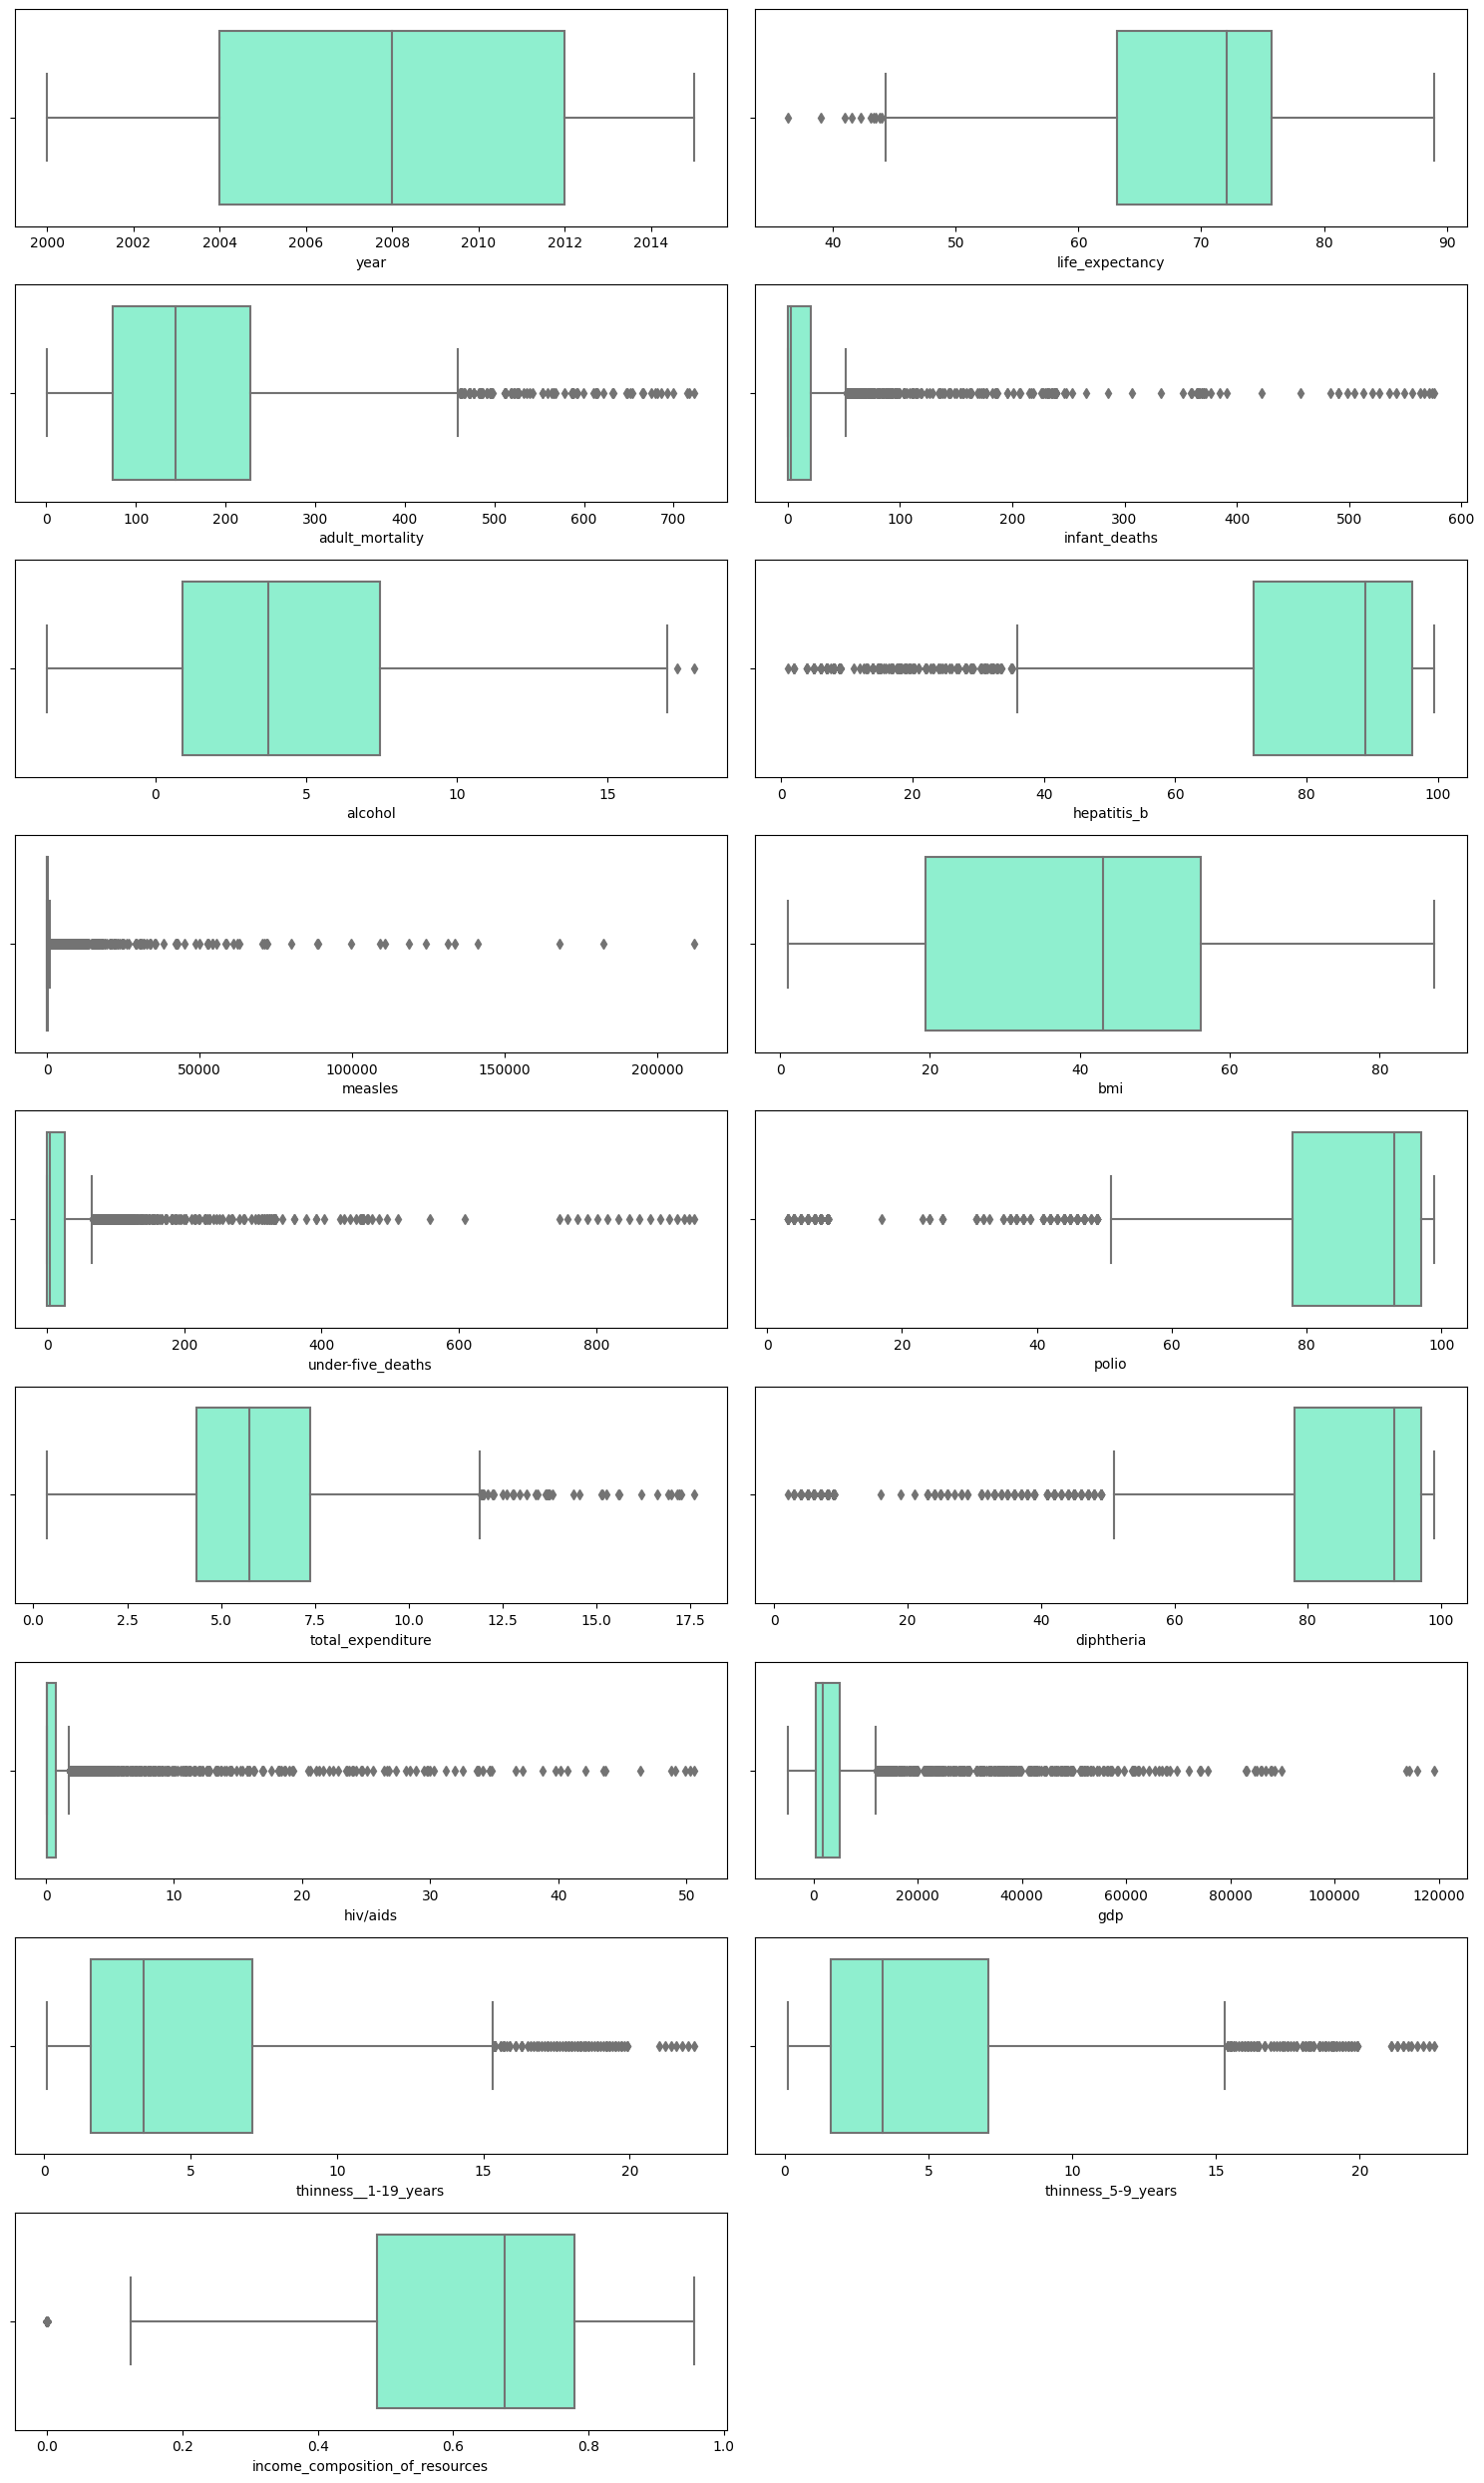

In [502]:
fig, axes = plt.subplots(9, 2, figsize=(15,25))
axes = axes.flat
for indice, columna in enumerate(numericas_outliers.columns):
    sns.boxplot(x = numericas_outliers[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

#Verificamos visualmente que hay cambios realizados en 'infant_deaths'

In [512]:
df.stb.missing()#Chequeamos que no tenemos nulos

,missing,total,percent
country,0,2922,0.0
under-five_deaths,0,2922,0.0
income_composition_of_resources,0,2922,0.0
thinness_5-9_years,0,2922,0.0
thinness__1-19_years,0,2922,0.0
gdp,0,2922,0.0
hiv/aids,0,2922,0.0
diphtheria,0,2922,0.0
total_expenditure,0,2922,0.0
polio,0,2922,0.0


---

#### `Vemos que existen muchos outliers por lo que dividiremos el dataframe en dos para analizarlo`

In [505]:
df_desarrollados = df[df["status"] == "Developed"]


In [506]:
df_endesarrollo= df[df["status"] == "Developing"]

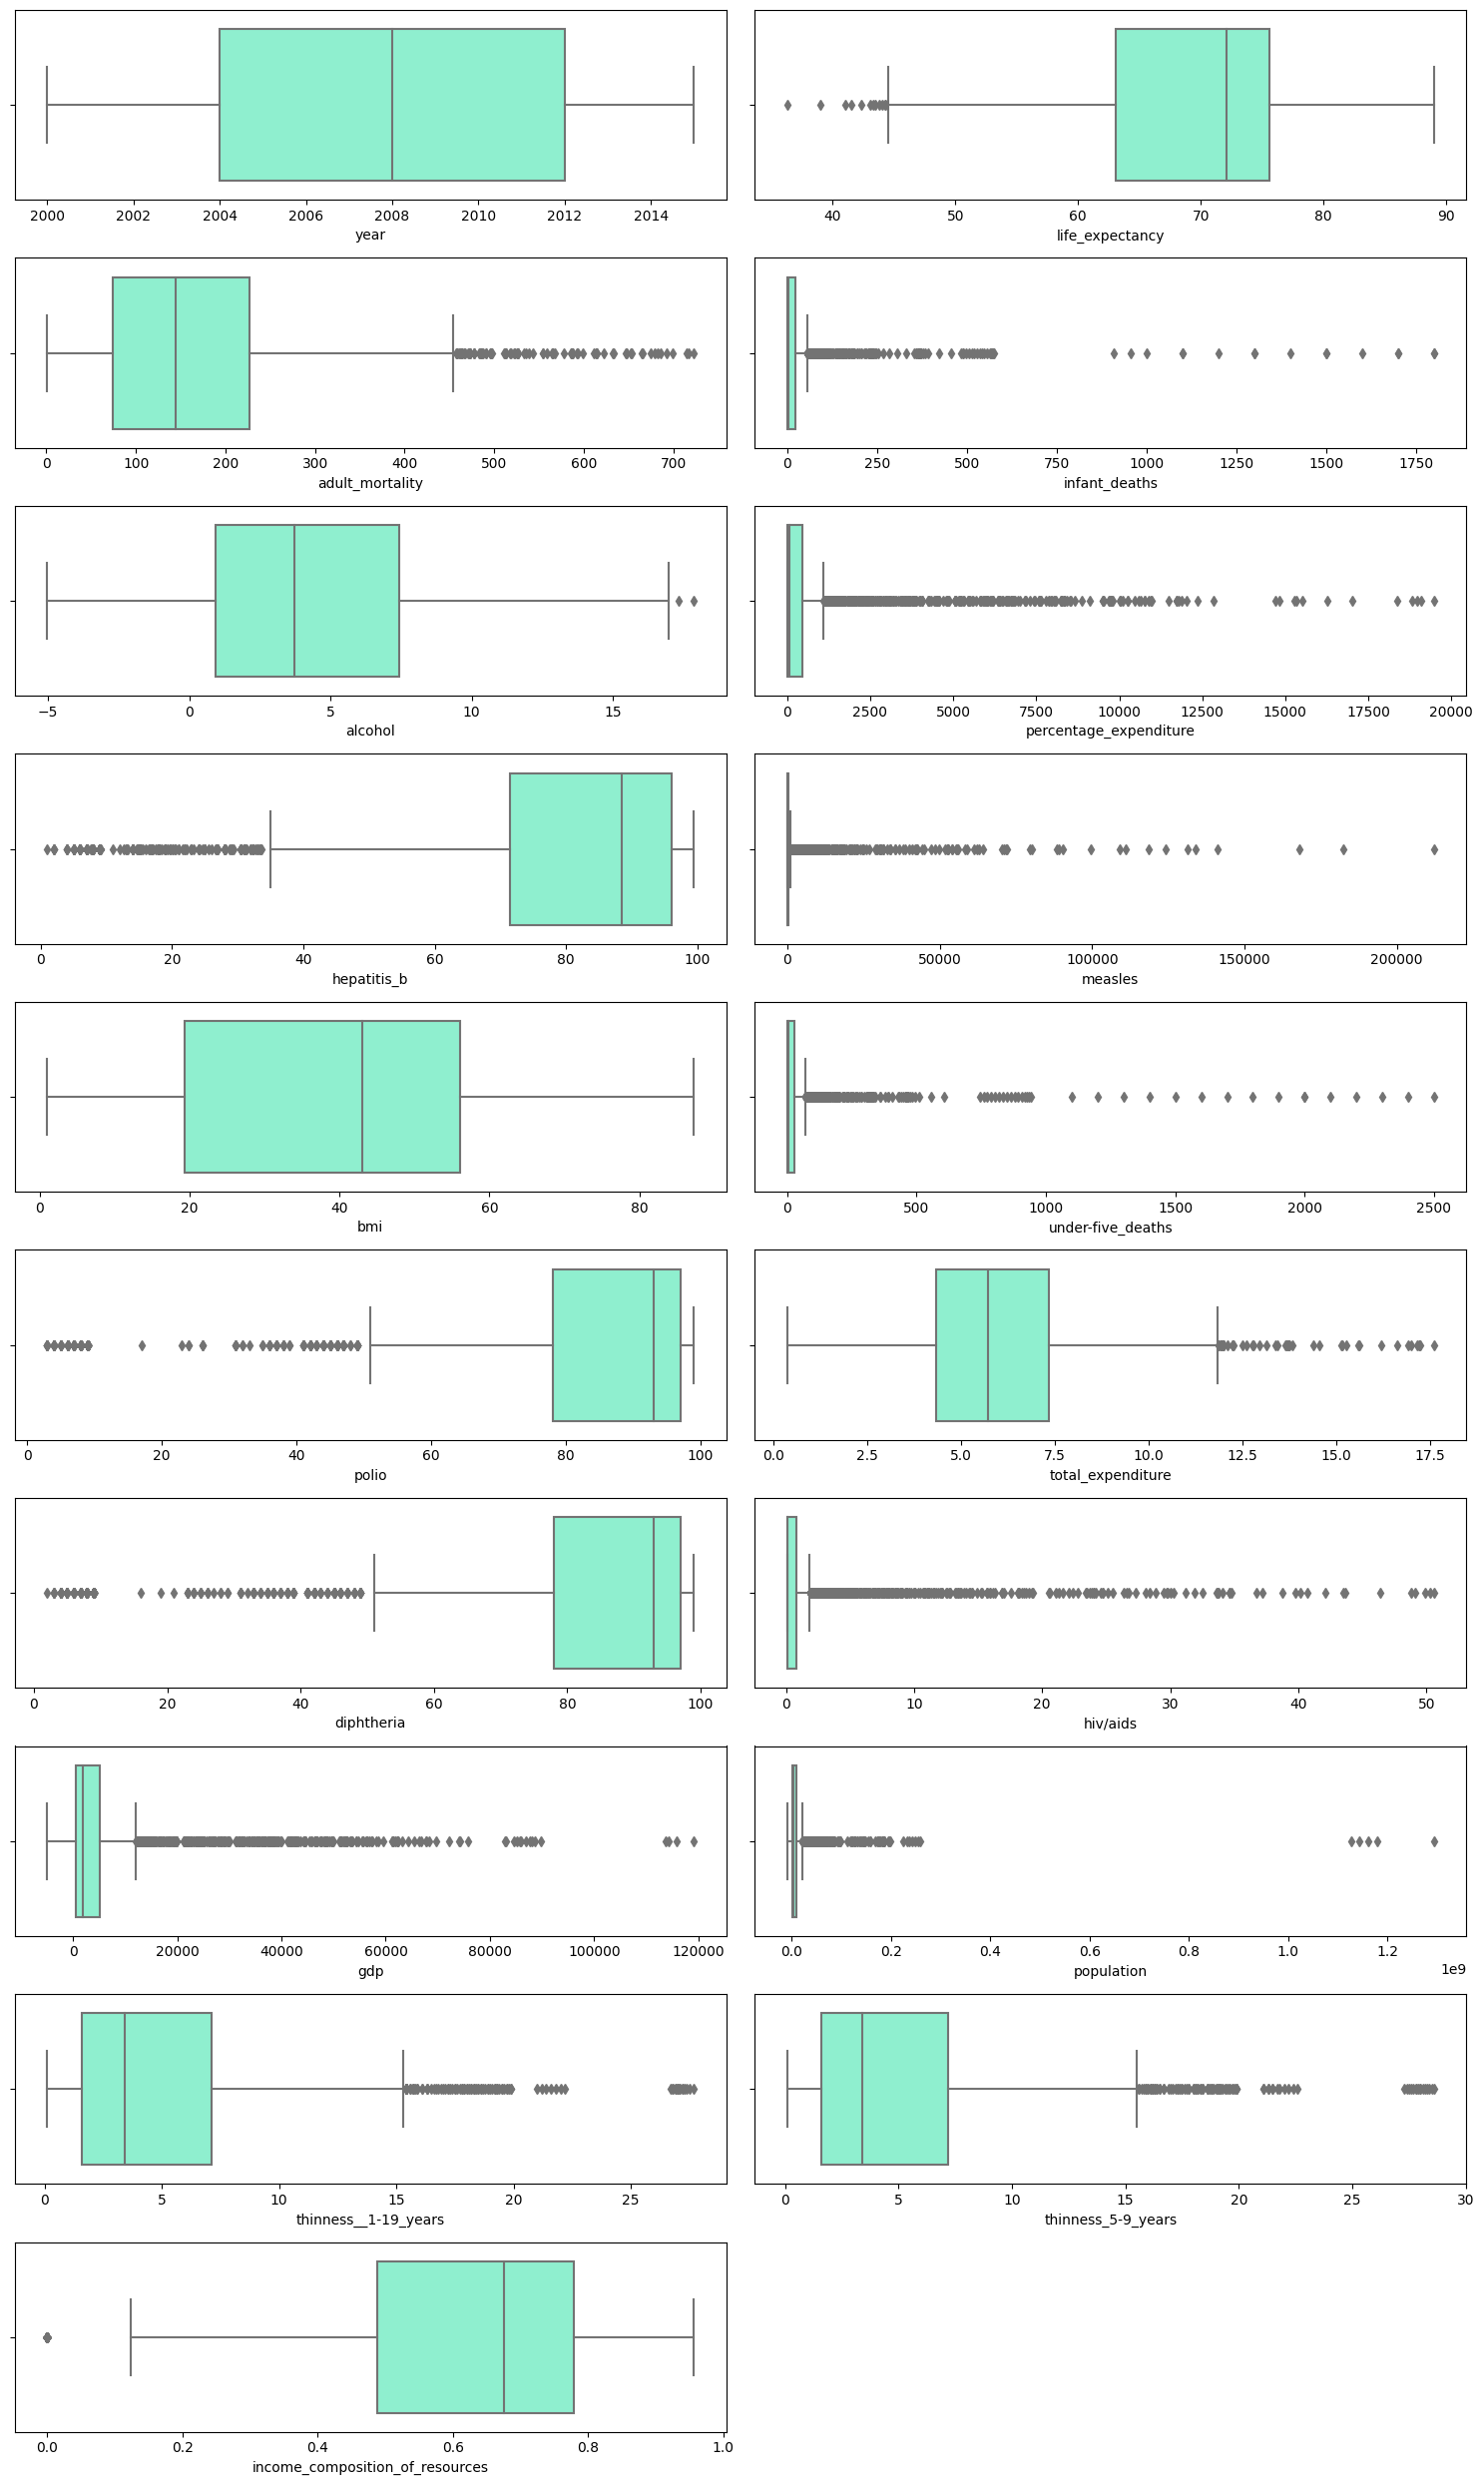

In [507]:
fig, axes = plt.subplots(10, 2, figsize=(15,25))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_desarrollados, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

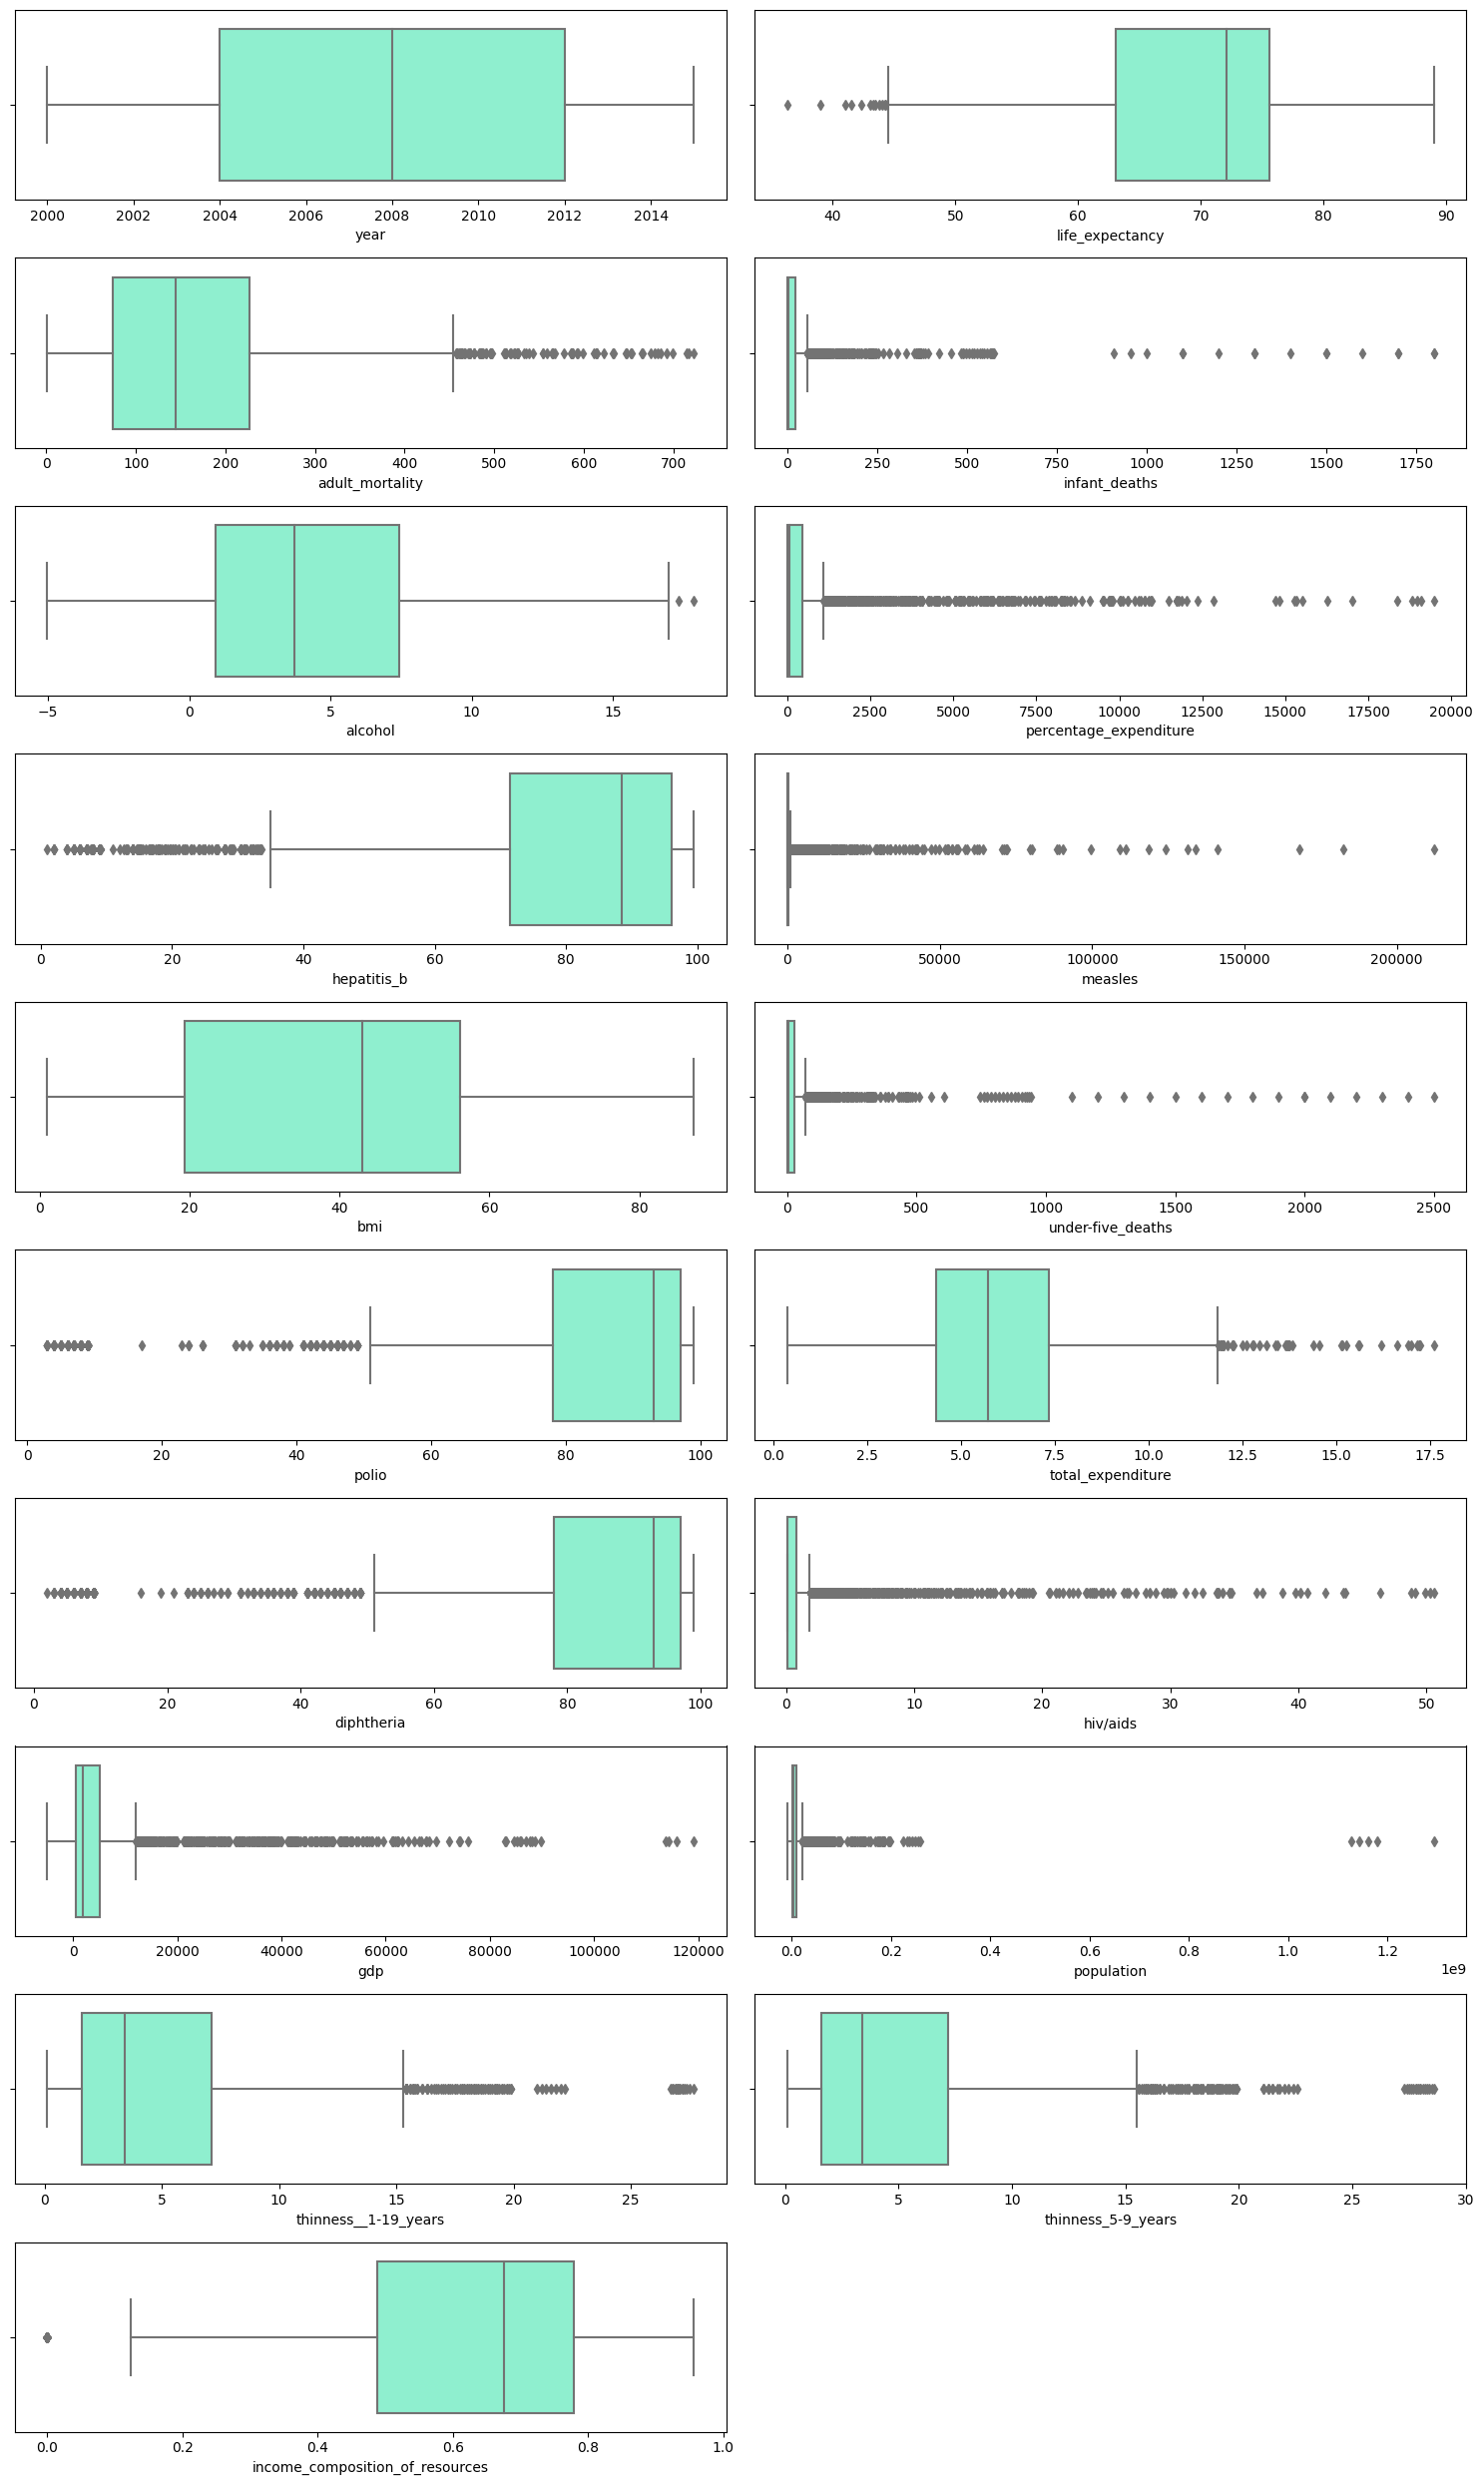

In [508]:
fig, axes = plt.subplots(10, 2, figsize=(15,25))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_endesarrollo, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

Seguimos teniendo en diferentes columnas muchos outliers por lo que decidiremos analizar un poco mas las relaciones entre columnas para ver como continuamos.

---

In [509]:
df_desarrollados.to_csv("../files/desarrollados.csv")

In [510]:
df_endesarrollo.to_csv("../files/endesarrollo.csv")

In [511]:
df.to_csv("../files/life_data_limp.csv")